## Problem 1

1(a)

In [1]:
def temp_tester(normal_temp):
    def health_temp(temp):
        if normal_temp - 1 <= temp <= normal_temp + 1:
            return True
        else: 
            return False
    return health_temp


1(b)

The description doesn’t specify whether the temperature is in Fahrenheit or Celsius. The normal body temperature differs depending on the scale, e.g., 98.6°F is normal for humans in Fahrenheit, while 37°C is normal in Celsius. Clarifying the unit of temperature would avoid confusion.

1(c)

In [2]:
human_tester = temp_tester(37)
chicken_tester = temp_tester(41.1)

In [3]:
print(chicken_tester(42))
print(human_tester(42))   
print(chicken_tester(43))
print(human_tester(35))   
print(human_tester(98.6))

True
False
False
False
False


## Problem 2

2(a)

In [4]:
import pandas as pd
data = pd.read_csv("us-states.csv")
data

# data source from New York Times at https://github.com/nytimes/covid-19-data

date          state  fips    cases  deaths
0      2020-01-21     Washington    53        1       0
1      2020-01-22     Washington    53        1       0
2      2020-01-23     Washington    53        1       0
3      2020-01-24       Illinois    17        1       0
4      2020-01-24     Washington    53        1       0
...           ...            ...   ...      ...     ...
61937  2023-03-23       Virginia    51  2298300   23782
61938  2023-03-23     Washington    53  1940704   15905
61939  2023-03-23  West Virginia    54   645710    8132
61940  2023-03-23      Wisconsin    55  2014524   16485
61941  2023-03-23        Wyoming    56   185800    2014

[61942 rows x 5 columns]

2(b)

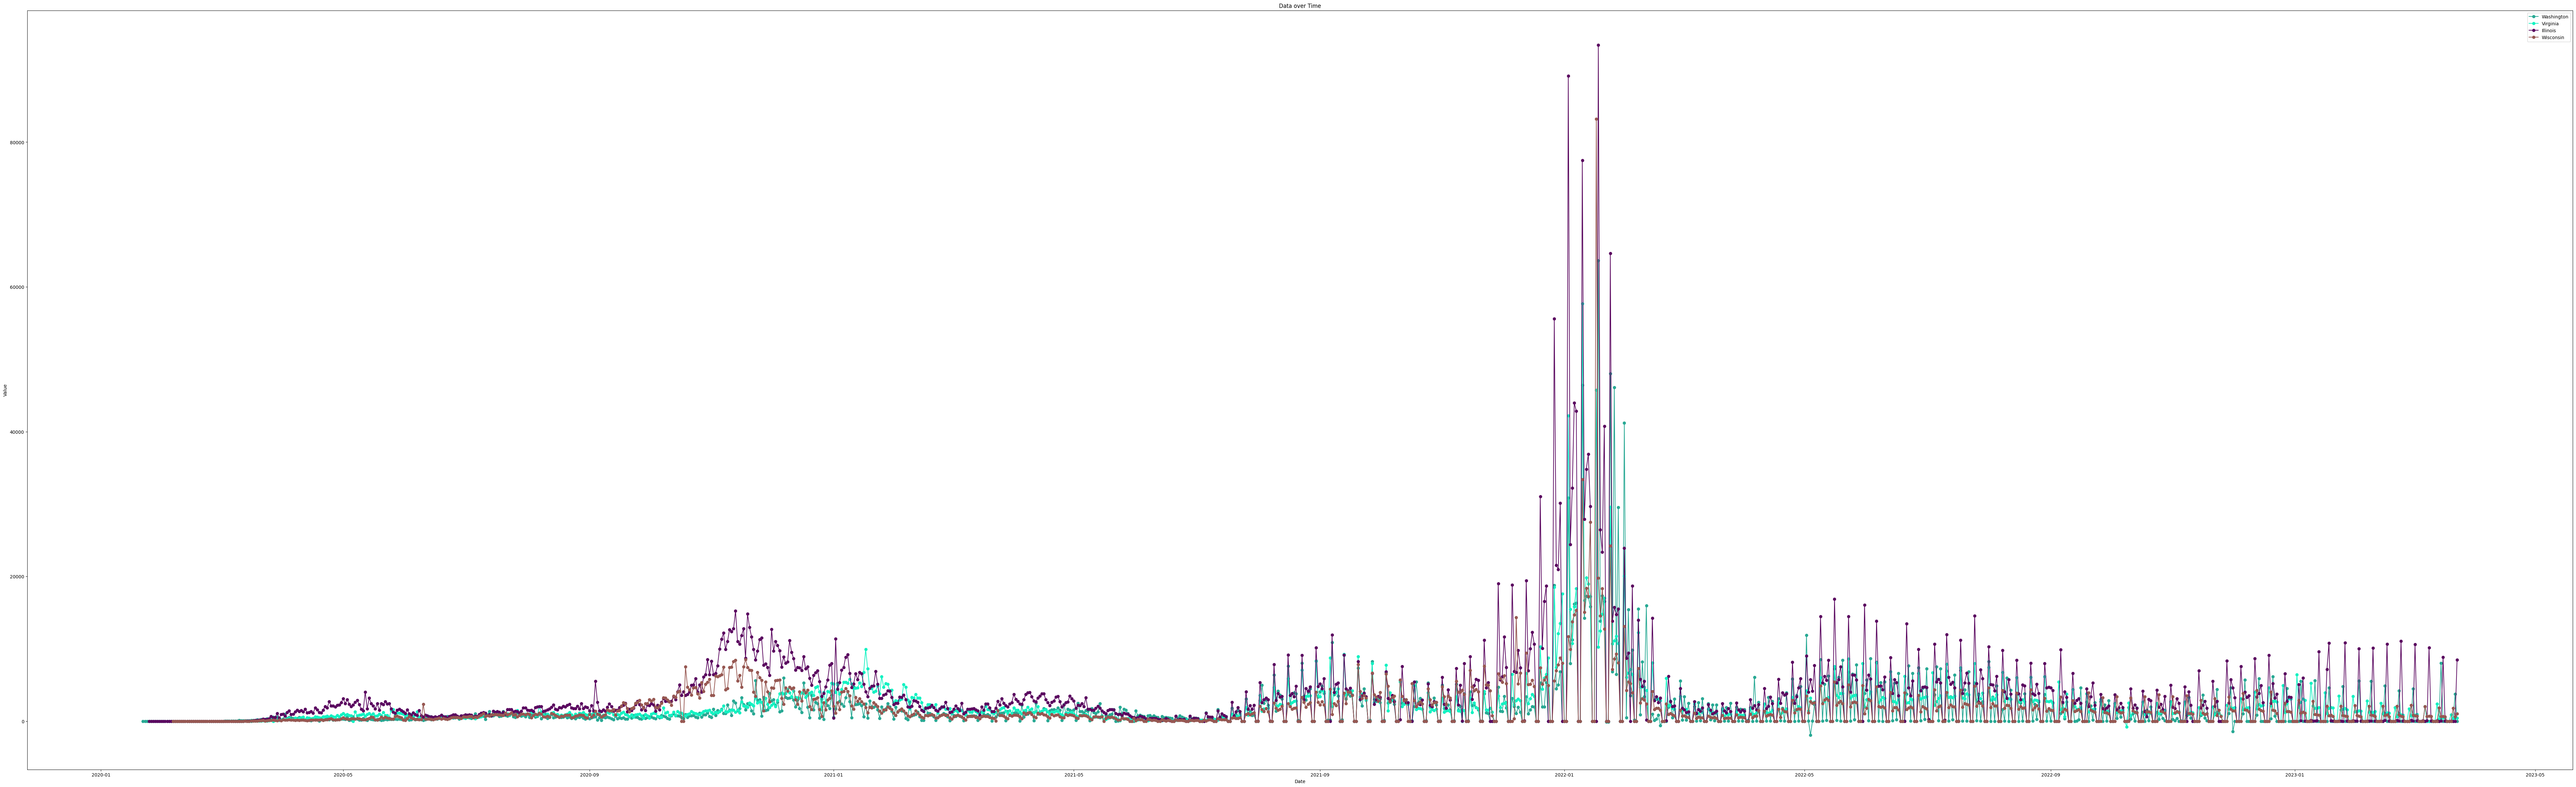

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np
def statecases(state_name):
    plt.figure(figsize=(100, 30))
    for i in state_name:
        filtered_df = data[data['state'] == i]
        new = []
        for j in range(len(filtered_df)-1):
            new.append((filtered_df.iloc[j+1,0],filtered_df.iloc[j+1,3]-filtered_df.iloc[j,3]))
        dates = [datetime.strptime(item[0], "%Y-%m-%d") for item in new]
        values = [item[1] for item in new]
        random_color = np.random.rand(3,)
        plt.plot(dates, values, marker = 'o', linestyle = '-', color = random_color, label = 'i')
    plt.title('Data over Time')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend(state_name)
    plt.show()

statecases(['Washington','Virginia','Illinois','Wisconsin'])


2(c)

In [6]:
def peak_case(state):
    filtered_df = data[data['state'] == state]
    new = []
    for j in range(len(filtered_df)-1):
        new.append((filtered_df.iloc[j+1,0],filtered_df.iloc[j+1,3]-filtered_df.iloc[j,3]))
    flag = 0
    date = 0
    for i in new:
        if i[1] > flag:
            flag = i[1]
            date = i[0]
    return date,flag
state = "Washington"
peak_date,peak_casenum = peak_case(state)
print('the peak date for state',state,'is',peak_date,'with',peak_casenum,'new cases.')


the peak date for state Washington is 2022-01-18 with 63640 new cases.


2(d)

In [7]:
def compare_peak(state0,state1):
    peak_date0,peak_casenum0 = peak_case(state0)
    peak_date1,peak_casenum1 = peak_case(state1)
    peak_date0,peak_date1 = pd.to_datetime(peak_date0),pd.to_datetime(peak_date1)
    if str(peak_date1 - peak_date0)[0] == '-':
        print(state1,'had its peak first, the number of days between the peaks of two states are',str(peak_date0 - peak_date1)[:-10]) 
    else:
        print(state0,'had its peak first, the number of days between the peaks of two states are',str(peak_date1 - peak_date0)[:-10]) 

compare_peak("Washington",'Virginia')

Virginia had its peak first, the number of days between the peaks of two states are 8 day


2(e)

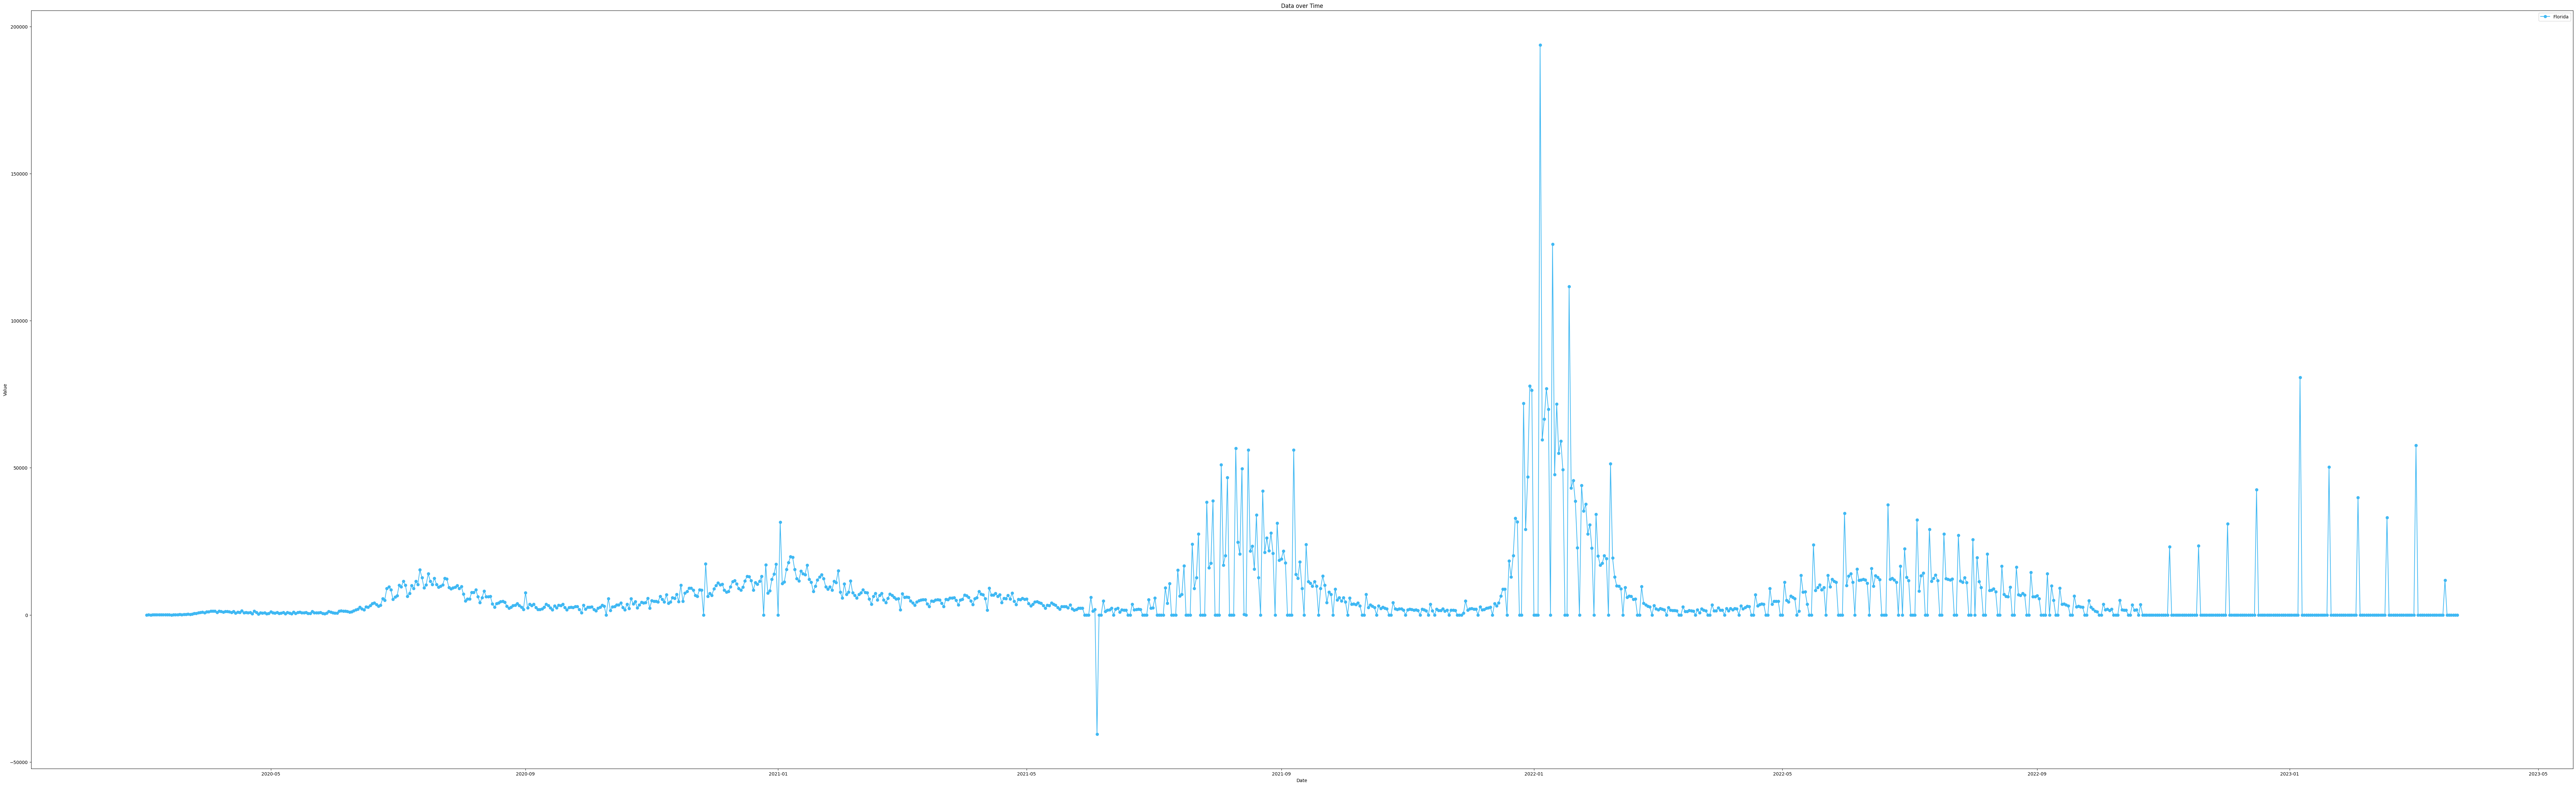

In [8]:
statecases(["Florida"])


There is a negative days for the new cases, which means the total cases drops at that time. The possible reasons might be at that time an accident occured at a hospital and some patient dead.

## Problem3

#### 3(a)

In [9]:
import sqlite3

with sqlite3.connect("hw0-population.db") as db:
    data = pd.read_sql_query("SELECT * FROM population", db)
data

name        age     weight eyecolor
0             Edna Phelps  88.895690  67.122450    brown
1              Cara Yasso   9.274597  29.251244    brown
2               Gail Rave  18.345613  55.347903    brown
3           Richard Adams  16.367545  70.352184    brown
4           Krista Slater  49.971604  70.563859    brown
...                   ...        ...        ...      ...
152356        John Fowler  23.930833  71.532569     blue
152357     Diana Shuffler  21.884819  67.936753    brown
152358    Kevin Cuningham  87.705907  60.074646    brown
152359    James Libengood  21.727666  81.774985    brown
152360  Cathleen Ballance  10.062236  34.327767    brown

[152361 rows x 4 columns]

There are 4 colmuns: name, age, weight, eye color. Contains total 152361 rows.

#### 3(b)

the mean, standard deviation, minimum, maximum for the age column are: 39.51052792739697 24.152760068601573 0.0007476719217636152 99.99154733076972


Text(0, 0.5, 'Number')

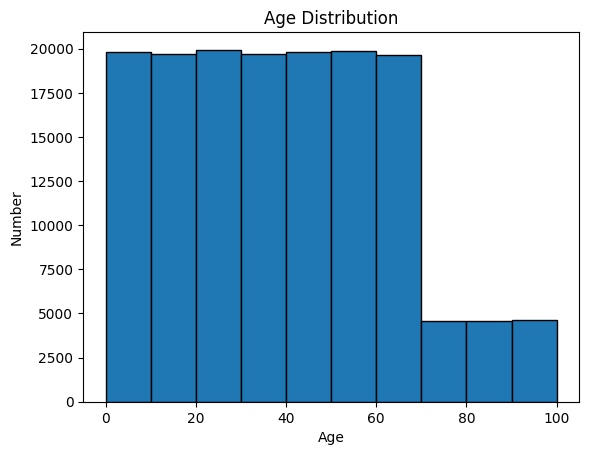

In [10]:
print("the mean, standard deviation, minimum, maximum for the age column are:", data['age'].mean(),(data['age'].var())**0.5,data['age'].min(),data['age'].max())
plt.figure()
plt.hist(data['age'], bins=10, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number')

The number of bins in a histogram affects the interpretation of the data. Too much or too less bins will change the patterns of the original distribution. A higher number of bins creates more divisions and a lower number of bins provides a more generalized view.

The number of population drops significantly in age larger than 70. For population before age 70 and after age 70, the number in different bin is nearly the same. 

#### 3(c)

the mean, standard deviation, minimum, maximum for the age column are: 60.884134159929715 18.41182426565962 3.3820836824389326 100.43579300336947


Text(0, 0.5, 'Number')

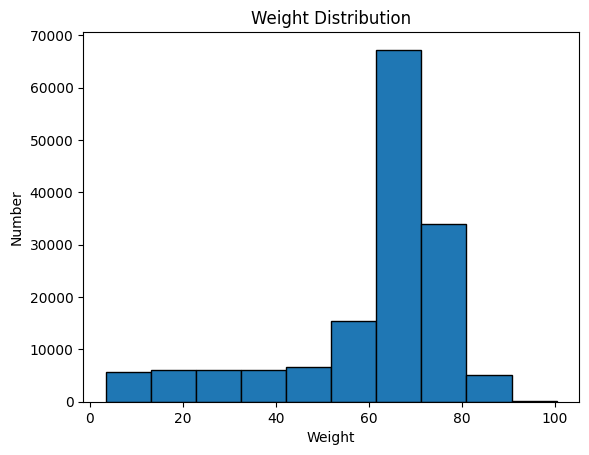

In [11]:
print("the mean, standard deviation, minimum, maximum for the age column are:", data['weight'].mean(),(data['weight'].var())**0.5,data['weight'].min(),data['weight'].max())
plt.figure()
plt.hist(data['weight'], bins=10, edgecolor='black')
plt.title('Weight Distribution')
plt.xlabel('Weight')
plt.ylabel('Number')

Most people's weight is around 70 kilograms. The whole distribution is closed to a normal distribution centered in 70.

#### 3(d)

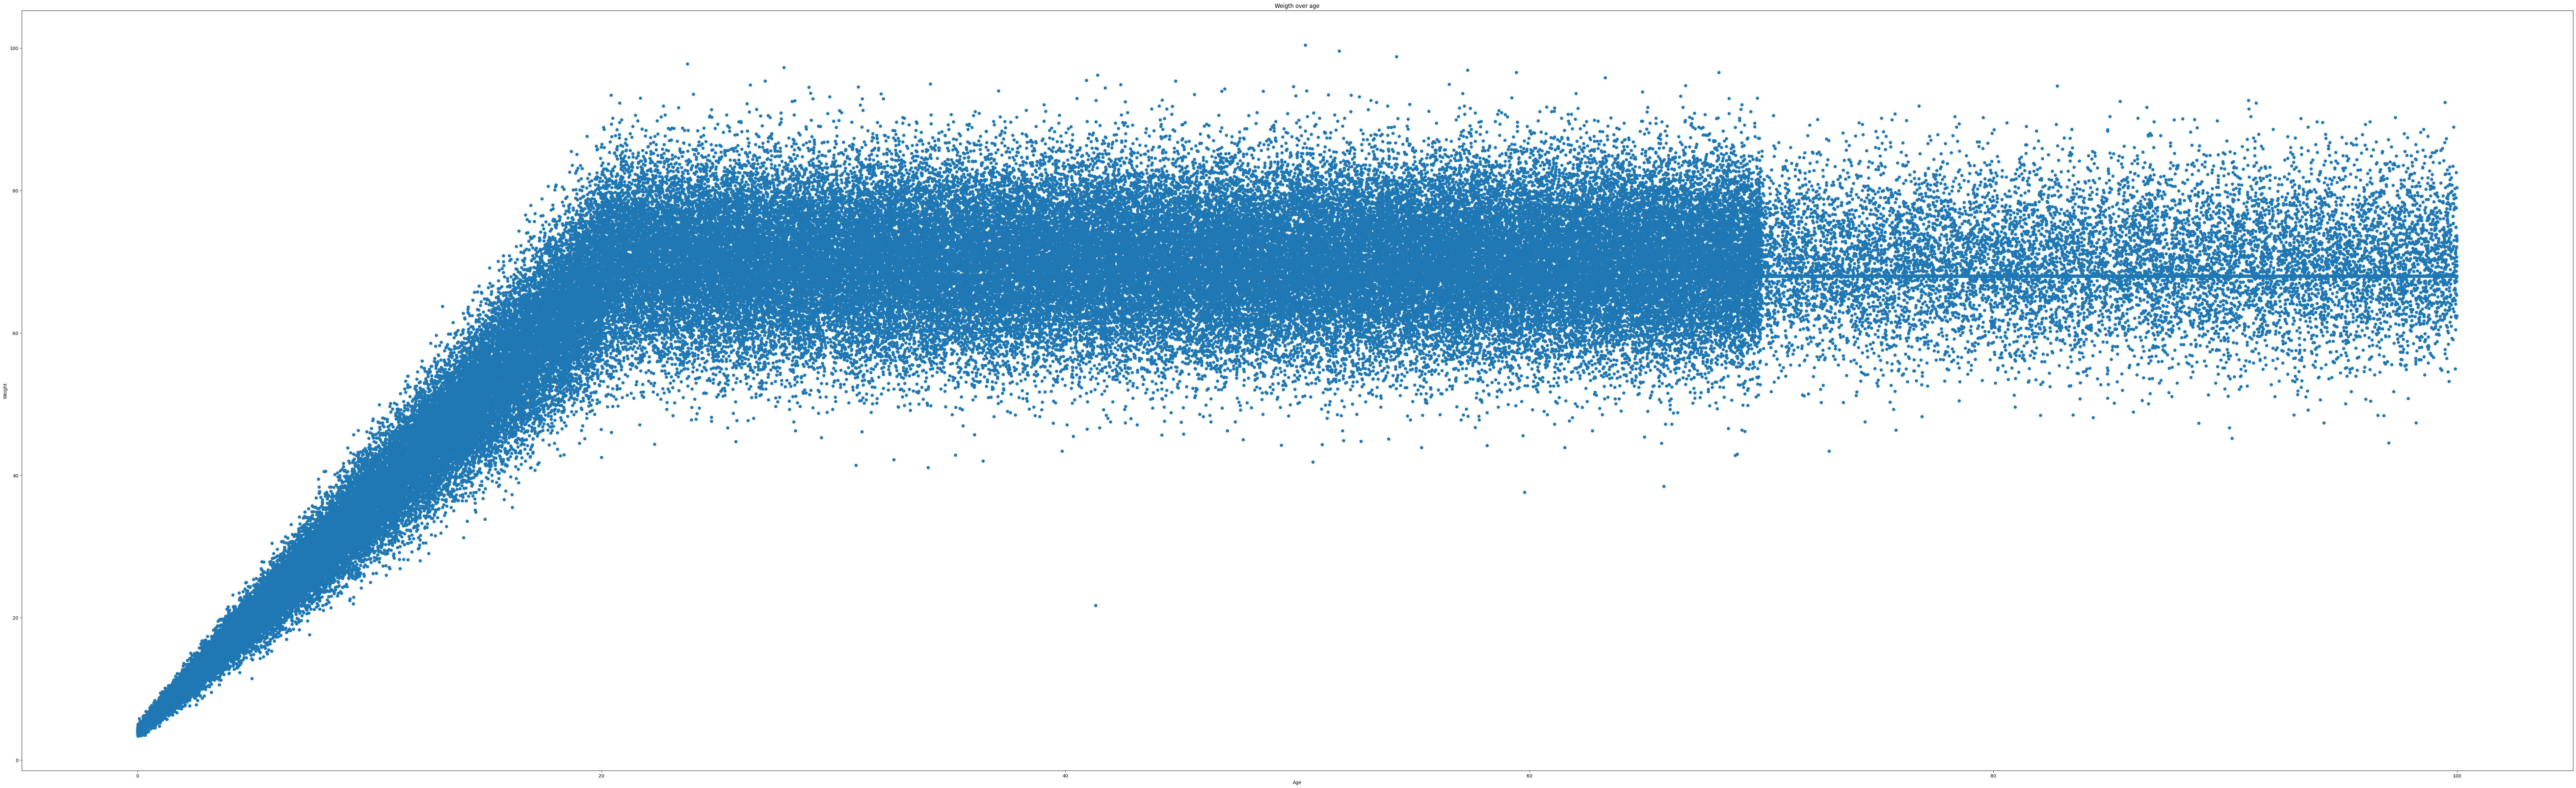

In [12]:
plt.figure(figsize=(100, 30))
plt.scatter(data['age'],data['weight'])
plt.title('Weigth over age')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.show()

The pattern of weight over age is the weight increase before age 20, after age 20, the weight does not grow anymore and is around 70.

From the graph we can see there is an outlier which has a siginificant low weight compares to others. To narrow this outlier, we find that only this outlier's weight is lower than 30 while older than 20. By applying this constraints we can get this outlier.

In [13]:
for i in range(len(data)):
    if data.iloc[i,1] > 20 and data.iloc[i,2] < 30:
        print(data.iloc[i,0])

Anthony Freeman


## Problem 4

#### 4(a)

In [14]:
import random
def generate_population(n, d):
    a = []
    for i in range(d):
        a.append(True)
    for j in range(n-d):
        a.append(False)
    return a


4(b)

In [15]:

def sample_pop(a,s):
    b = random.sample(a,s)
    t = 0
    f = 0
    for i in b:
        c = random.randint(0,1)
        if c == 0:
            c = random.randint(0,1)
            if c == 0:
                t += 1
            else:
                f += 1
        else:
            if i == True:
                t += 1
            else:
                f += 1
    return t

#### 4(c)

In [16]:
def est_func(n,d,s):
    a = generate_population(n, d)
    t = sample_pop(a,s)
    t = t/s*n
    return max(t,0) # to avoid negativity


#### 4(d)

In [17]:
print(est_func(1000,100,50))

280.0


#### 4(e)

to generate enough data to make sure the outcome is stable we choose a large number 5000 to simulate. 

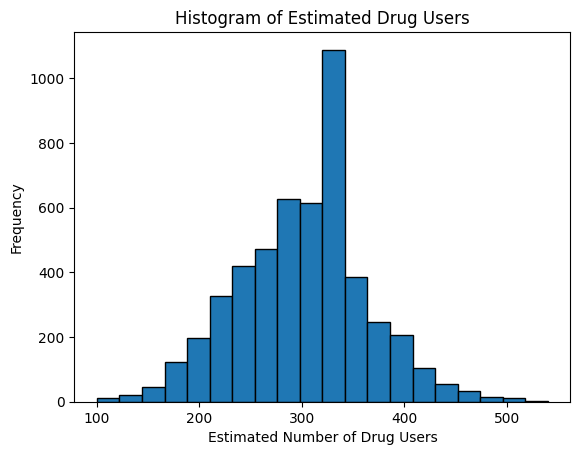

In [18]:
estimate = []
for i in range(5000):
    estimate.append(est_func(1000,100,50))
    
plt.hist(estimate, bins=20, edgecolor='black')
plt.title('Histogram of Estimated Drug Users')
plt.xlabel('Estimated Number of Drug Users')
plt.ylabel('Frequency')
plt.show()

#### 4(f)

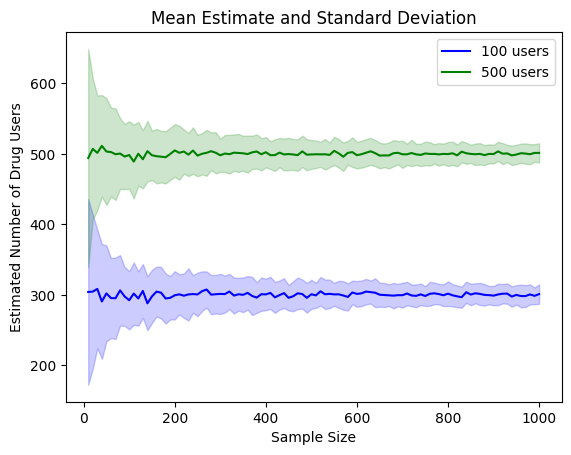

In [19]:
def explore_sample_size_effect(n, usernumber, samplesize, repetitions=100):
    means = {users: [] for users in usernumber}
    std_devs = {users: [] for users in usernumber}

    for s in samplesize:
        for users in usernumber:
            estimates = [est_func(n, users, s) for _ in range(repetitions)]
            means[users].append(np.mean(estimates))
            std_devs[users].append(np.std(estimates))
    plt.figure()

    for users, color in zip(usernumber, ['blue', 'green']):
        plt.plot(samplesize, means[users], label=f'{users} users', color=color)
        plt.fill_between(samplesize,
                         np.array(means[users]) - np.array(std_devs[users]),
                         np.array(means[users]) + np.array(std_devs[users]),
                         color=color, alpha=0.2)
    
    plt.title('Mean Estimate and Standard Deviation')
    plt.xlabel('Sample Size')
    plt.ylabel('Estimated Number of Drug Users')
    plt.legend()
    plt.show()

# Exploring with 100 and 500 drug users
explore_sample_size_effect(1000, [100, 500], range(10, 1001, 10))